<a href="https://colab.research.google.com/github/Mi-Lis/notebooks/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Регрессия

## Генерация линейной зависимости

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [ ]:
X, y = make_regression(n_features=1, noise=20.0, random_state=57)
# X, y

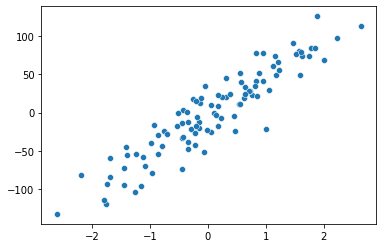

In [ ]:
sns.scatterplot(x=X.ravel(), y=y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

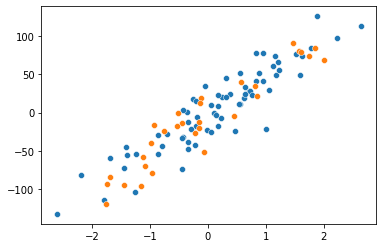

In [ ]:
sns.scatterplot(x=X_train.ravel(), y=y_train)
sns.scatterplot(x=X_test.ravel(), y=y_test);

# Линейная регрессия

In [ ]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)

y_pred = line_model.predict(X_test)

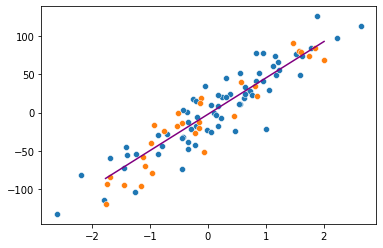

In [ ]:
sns.scatterplot(x=X_train.ravel(), y=y_train)
sns.scatterplot(x=X_test.ravel(), y=y_test)
sns.lineplot(x=X_test.ravel(), y=y_pred, color='purple');
# sns.scatterplot(x=X_test.ravel(), y=y_pred, color='purple');

In [ ]:
line_model.score(X_train, y_train), line_model.score(X_test, y_test)

(0.8386524389502991, 0.8857661118850494)

In [ ]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.8857661118850494, 407.6191793182476)

## Полиномиальная регрессия

In [ ]:
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=18)
y = np.log(y + 250)

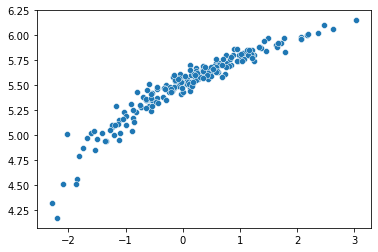

In [ ]:
sns.scatterplot(x=X.ravel(), y=y);

In [ ]:
line_model = LinearRegression()
line_model.fit(X, y)

y_lin = line_model.predict(X)

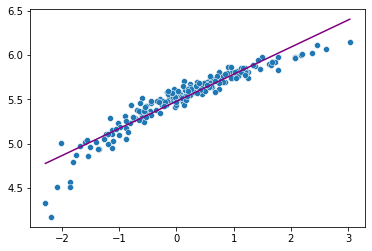

In [ ]:
sns.scatterplot(x=X.ravel(), y=y)
sns.lineplot(x=X.ravel(), y=y_lin, color='purple');

In [ ]:
poly_features = PolynomialFeatures(3)
X_poly = poly_features.fit_transform(X)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_p = poly_model.predict(X_poly)

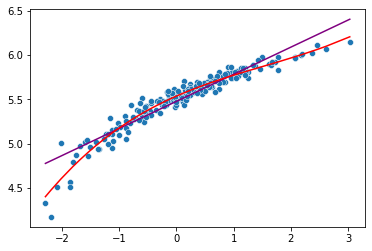

In [ ]:
sns.scatterplot(x=X.ravel(), y=y)
sns.lineplot(x=X.ravel(), y=y_lin, color='purple')
sns.lineplot(x=X.ravel(), y=y_p, color='red');

In [ ]:
r2_score(y, y_lin), mean_squared_error(y, y_lin)

(0.8907931501840032, 0.01153104777677539)

In [ ]:
r2_score(y, y_p), mean_squared_error(y, y_p)

(0.9479892044535948, 0.0054917706111310615)

[california-housing-dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [ ]:
h_X, h_y = fetch_california_housing(return_X_y=True, as_frame=True)

In [ ]:
type(h_X), type(h_y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
h_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
h_y.head(10)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

In [ ]:
h_y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [ ]:
h_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
h_X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
h_X[h_X.AveRooms > 100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08


In [ ]:
h_X[h_X.AveBedrms > 10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49


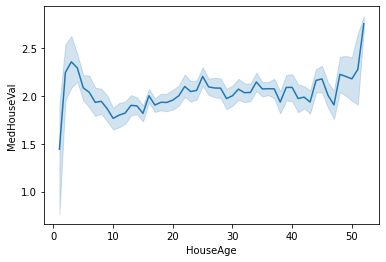

In [ ]:
sns.lineplot(x=h_X['HouseAge'], y=h_y)

In [ ]:
fig = px.density_mapbox(h_X, lat='Latitude', lon='Longitude', z=h_y,
                        center=dict(lat=h_X.Latitude.mean(),
                                    lon=h_X.Longitude.mean()),
                        zoom=4, radius=10,
                        mapbox_style="stamen-terrain")
fig.show()

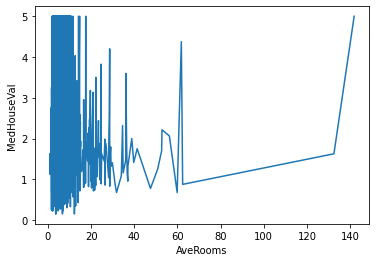

In [ ]:
sns.lineplot(x=h_X['AveRooms'], y=h_y);

In [ ]:
h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(h_X, h_y, test_size=0.3)

In [ ]:
line_model = LinearRegression()
line_model.fit(h_X_train, h_y_train)
h_y_pred = line_model.predict(h_X_test)

In [ ]:
line_model.score(h_X_train, h_y_train), line_model.score(h_X_test, h_y_test)

(0.6041865724072346, 0.6098795536847396)

In [ ]:
mean_squared_error(h_y_test, h_y_pred)

0.5282694359991513

In [ ]:
h_y_test.describe()

count    6192.000000
mean        2.076994
std         1.163760
min         0.225000
25%         1.196000
50%         1.809000
75%         2.641250
max         5.000010
Name: MedHouseVal, dtype: float64

In [ ]:
pd.Series(h_y_pred).describe()

count    6192.000000
mean        2.064758
std         0.904706
min        -0.624805
25%         1.486900
50%         2.022029
75%         2.554698
max         7.102033
dtype: float64

## Выбросы

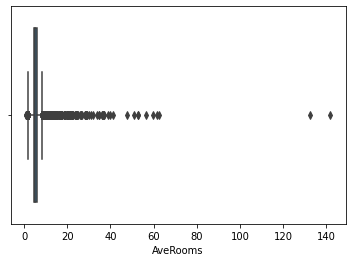

In [ ]:
sns.boxplot(x=h_X['AveRooms']);

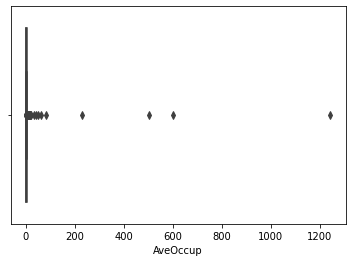

In [ ]:
sns.boxplot(x=h_X['AveOccup']);

In [ ]:
mask = (h_X['AveRooms'] < 12) & (h_X['AveOccup'] < 10)
h_X, h_y = h_X[mask], h_y[mask]

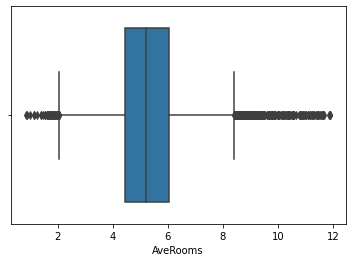

In [ ]:
sns.boxplot(x=h_X['AveRooms']);

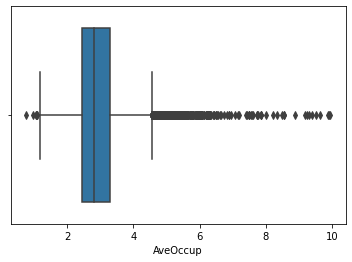

In [ ]:
sns.boxplot(x=h_X['AveOccup']);

In [ ]:
h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(h_X, h_y, test_size=0.3)
line_model = LinearRegression()
line_model.fit(h_X_train, h_y_train)
h_y_pred = line_model.predict(h_X_test)

In [ ]:
line_model.score(h_X_train, h_y_train), line_model.score(h_X_test, h_y_test)

(0.6595429385686827, 0.6639034265181962)

In [ ]:
mean_squared_error(h_y_test, h_y_pred)

0.447594800394615

In [ ]:
pf = PolynomialFeatures()
h_X_poly = pf.fit_transform(h_X_train)
line_model = LinearRegression()
line_model.fit(h_X_poly, h_y_train)
h_y_pred = line_model.predict(h_X_poly)

In [ ]:
mean_squared_error(h_y_train, h_y_pred)

0.3689684731671019

In [ ]:
h_y_test.describe()

count    6138.000000
mean        2.052436
std         1.154106
min         0.149990
25%         1.181000
50%         1.761500
75%         2.624750
max         5.000010
Name: MedHouseVal, dtype: float64

In [ ]:
pd.Series(h_y_pred).describe()

count    14321.000000
mean         2.079604
std          0.981887
min         -0.409831
25%          1.327799
50%          1.961286
75%          2.682540
max          6.520601
dtype: float64